# Comparison: Image Segmentation 
https://archive.ics.uci.edu/ml/datasets/image+segmentation

In [1]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive/')
sys.path.append('/content/drive/MyDrive/Project/EDQC/dqc')

Mounted at /content/drive/


## Initialization

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils.visualization import animator


## Reading Data

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.test', header=None, skiprows=range(0,5))
label = 'Image Segmentation'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2100 non-null   object 
 1   1       2100 non-null   float64
 2   2       2100 non-null   float64
 3   3       2100 non-null   int64  
 4   4       2100 non-null   float64
 5   5       2100 non-null   float64
 6   6       2100 non-null   float64
 7   7       2100 non-null   float64
 8   8       2100 non-null   float64
 9   9       2100 non-null   float64
 10  10      2100 non-null   float64
 11  11      2100 non-null   float64
 12  12      2100 non-null   float64
 13  13      2100 non-null   float64
 14  14      2100 non-null   float64
 15  15      2100 non-null   float64
 16  16      2100 non-null   float64
 17  17      2100 non-null   float64
 18  18      2100 non-null   float64
 19  19      2100 non-null   float64
dtypes: float64(18), int64(1), object(1)
memory usage: 328.2+ KB


In [83]:
s = '''
1. region-centroid-col: the column of the center pixel of the region.
2. region-centroid-row: the row of the center pixel of the region.
3. region-pixel-count: the number of pixels in a region = 9.
4. short-line-density-5: the results of a line extractoin algorithm that counts how many lines of length 5 (any orientation) with low contrast, less than or equal to 5, go through the region.
5. short-line-density-2: same as short-line-density-5 but counts lines of high contrast, greater than 5.
6. vedge-mean: measure the contrast of horizontally adjacent pixels in the region. There are 6, the mean and standard deviation are given. This attribute is used as a vertical edge detector.
7. vegde-sd: (see 6)
8. hedge-mean: measures the contrast of vertically adjacent pixels. Used for horizontal line detection.
9. hedge-sd: (see 8).
10. intensity-mean: the average over the region of (R + G + B)/3
11. rawred-mean: the average over the region of the R value.
12. rawblue-mean: the average over the region of the B value.
13. rawgreen-mean: the average over the region of the G value.
14. exred-mean: measure the excess red: (2R - (G + B))
15. exblue-mean: measure the excess blue: (2B - (G + R))
16. exgreen-mean: measure the excess green: (2G - (R + B))
17. value-mean: 3-d nonlinear transformation of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals of Interactive Computer Graphics)
18. saturatoin-mean: (see 17)
19. hue-mean: (see 17)
'''
t = '''
 1   1       2100 non-null   float64
 2   2       2100 non-null   float64
 3   3       2100 non-null   int64  
 4   4       2100 non-null   float64
 5   5       2100 non-null   float64
 6   6       2100 non-null   float64
 7   7       2100 non-null   float64
 8   8       2100 non-null   float64
 9   9       2100 non-null   float64
 10  10      2100 non-null   float64
 11  11      2100 non-null   float64
 12  12      2100 non-null   float64
 13  13      2100 non-null   float64
 14  14      2100 non-null   float64
 15  15      2100 non-null   float64
 16  16      2100 non-null   float64
 17  17      2100 non-null   float64
 18  18      2100 non-null   float64
 19  19      2100 non-null   float64
 '''



In [84]:
t = t.split('\n')[1:-1]

In [85]:
s = s.split('\n')[1:-1]

In [86]:
for i in range(19):
  ti = t[i].split()
  ti.pop(1)
  tij = ''
  for j in ti:
    tij += j + ' '
  tij += s[i].split('.')[1]
  t[i] = tij

In [87]:
for i in range(19):
  print(f'{t[i]} ({data[i+1].min()},{data[i+1].max()})')

1 2100 non-null float64  region-centroid-col: the column of the center pixel of the region (1.0,254.0)
2 2100 non-null float64  region-centroid-row: the row of the center pixel of the region (11.0,251.0)
3 2100 non-null int64  region-pixel-count: the number of pixels in a region = 9 (9,9)
4 2100 non-null float64  short-line-density-5: the results of a line extractoin algorithm that counts how many lines of length 5 (any orientation) with low contrast, less than or equal to 5, go through the region (0.0,0.33333334)
5 2100 non-null float64  short-line-density-2: same as short-line-density-5 but counts lines of high contrast, greater than 5 (0.0,0.22222222)
6 2100 non-null float64  vedge-mean: measure the contrast of horizontally adjacent pixels in the region (0.0,29.222221)
7 2100 non-null float64  vegde-sd: (see 6) (0.0,991.7184)
8 2100 non-null float64  hedge-mean: measures the contrast of vertically adjacent pixels (0.0,44.722225)
9 2100 non-null float64  hedge-sd: (see 8) (-1.5894573

In [88]:
data.duplicated().sum()

14

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.shape

(2086, 20)

In [7]:
data.drop([3], axis=1, inplace=True)

In [8]:
classes = data[0]
data.drop(0, axis=1, inplace=True)

In [9]:
classes.value_counts()

GRASS        300
CEMENT       300
SKY          300
FOLIAGE      299
WINDOW       298
BRICKFACE    297
PATH         292
Name: 0, dtype: int64

In [94]:
data.head()

,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,110.0,189.0,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [95]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
1,2086.0,124.804890,72.860985,1.000000e+00,62.000000,121.000000,188.000000,254.000000
2,2086.0,123.242570,57.502202,1.100000e+01,81.000000,121.000000,170.000000,251.000000
4,2086.0,0.015021,0.041143,0.000000e+00,0.000000,0.000000,0.000000,0.333333
5,2086.0,0.004581,0.023649,0.000000e+00,0.000000,0.000000,0.000000,0.222222
6,2086.0,1.891925,2.655764,0.000000e+00,0.722222,1.250001,2.222221,29.222221
7,2086.0,5.732394,45.138712,0.000000e+00,0.349603,0.833333,1.807146,991.718400
8,2086.0,2.394828,3.460072,0.000000e+00,0.833331,1.444444,2.555556,44.722225
9,2086.0,7.792147,53.516712,-1.589457e-08,0.421638,0.975628,2.209636,1386.329200
10,2086.0,37.135773,38.217742,0.000000e+00,7.527778,21.611111,53.444443,143.444440
11,2086.0,32.882391,35.074112,0.000000e+00,7.027778,19.666668,47.444443,137.111110


## Exploratory Data Analysis

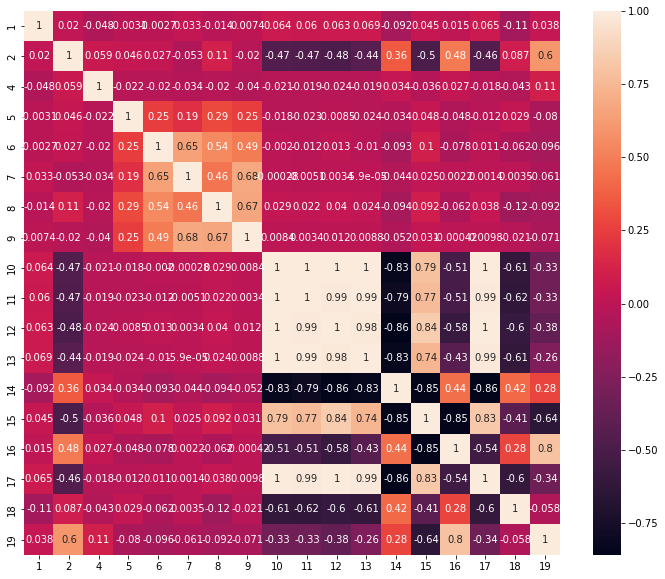

In [96]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

In [97]:
data.drop([10], axis=1, inplace=True)

In [98]:
data.drop([17], axis=1, inplace=True)

In [99]:
data.drop([11,12,13], axis=1, inplace=True)

In [100]:
data.shape

(2086, 13)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6, random_state=0)
df = pd.DataFrame(pca.fit_transform(data))

In [12]:
df['class'] = classes

In [31]:
new_df = df.groupby('class').apply(lambda x: x.sample(n=50)).reset_index(drop = True)


In [32]:
from pandas.core.base import value_counts
new_df['class'].value_counts()

BRICKFACE    50
CEMENT       50
FOLIAGE      50
GRASS        50
PATH         50
SKY          50
WINDOW       50
Name: class, dtype: int64

In [ ]:
sns.pairplot(df, hue='class')

KeyboardInterrupt: ignored

In [ ]:
data['class'] = classes

In [ ]:
sns.pairplot(data, hue='class', ) #palette={1: 'orange', 2:'blue', 3: 'green'}

In [ ]:
data.drop('class', axis=1, inplace=True)

In [33]:
classes = new_df['class']
new_df.drop('class', axis=1, inplace=True)

In [34]:
for col in new_df.columns:
  new_df[col] = (new_df[col] - new_df[col].min())/ (new_df[col].max() - new_df[col].min())

In [ ]:
df.head()

In [ ]:
cc = pd.DataFrame(index=classes.drop_duplicates().to_list(), data=['blue', 'orange', 'green', 'red', 'brown', 'magenta', 'black'])

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = classes.apply(lambda r: cc.loc[r])[0].to_list()
ax.scatter(df[0], df[1], df[2], c=labels, marker='.', s=150)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA_X')
ax.set_ylabel('PCA_Y')
ax.set_zlabel('PCA_Z')
ax.set_title('3D plot of KMeans Clustering')


In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df[0], y=df[2], hue=classes, legend=False, s=150)
# plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=150, c='black')

## 

In [21]:
from   model.dqc import DQC
import model.base_dqc as dqc

In [23]:
def run_model(df, SIGMA = 0.01, M = 0.07):
  edqc = DQC(df)
  edqc.calculate_N(SIGMA)
  N = np.array(edqc.N)
  data_fit = np.array(edqc.data_fit)
  H = dqc.calculate_H(data_fit,SIGMA,M)
  H = dqc.basis_transform(H,N)
  H = (np.abs(H) <= 1) * 1 + (np.abs(H) > 1) * -1
  X = dqc.calculate_X(data_fit,M)
  X = dqc.basis_transform(X,N,is_expectation=True)

  P,H = dqc.diagonalize_H(H)

  H = np.round(H, 4)

  # H = H < -4

  traj,N_traj = dqc.trajectory(df,P,H,X,N,steps=10000,delta=10**4,sigma=SIGMA,m=M,stride=50)
  S = dqc.reverse_entropy(traj, N_traj)

  return N, H, X , P, traj, N_traj, S

In [ ]:
import gc
gc.collect()

In [35]:
N, H, X , P, traj, N_traj, S = run_model(df=new_df, SIGMA =  .5, M = 0.1 )

/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:229: ComplexWarning: Casting complex values to real discards the imaginary part
  H_diag[i] = evals[i] * H_diag[i]
/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:391: RuntimeWarning: divide by zero encountered in double_scalars
  S[step] = S[step] - 1/p * np.log(1/p)


In [36]:
HH = H.diagonal()

In [37]:
np.round(HH,0)

array([308., -36., -33., -32., -30., -24., -23., -22., -20., -20., -20.,
       -19., -18., -18.,  14., -17.,  14.,  14., -17., -16., -16., -16.,
       -16., -16., -16., -15., -15., -15., -14., -14., -14., -14., -14.,
       -14., -13., -13., -13.,  13.,  13.,  13.,  13.,  12.,  12.,  12.,
        12.,  12.,  12.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,   9., -13., -13.,
       -13., -12., -12., -12., -12., -12., -12., -12., -12., -12., -12.,
       -11., -11., -11., -11., -11., -11.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9., -11., -11., -11., -10., -10., -10.,   9.,   8.,
         8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,
         8.,   7.,   7.,   7.,   7., -10., -10., -10., -10., -10., -10.,
        -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,
        -9.,  -8.,  -8.,  -8.,  -9.,   7.,   7.,   7.,   7.,   7.,   7.,
         7.,   7.,   6.,   6.,   6.,   6.,   6.,   

In [ ]:
len([i for i in np.round(HH ,-1) if i != 0])

In [ ]:
len(set([np.abs(i) for i in np.round(HH/2 ,0) if i != 0]))

In [ ]:
l = []
for j in [i for i in np.round(HH ,0) if i != 0]:
  if len(l) == 6: 
    print(l)
    l = []
  l.append(j)



In [ ]:
c.drop_duplicates().tolist()

In [ ]:
c[c == cc].index

In [ ]:
plt.hist(np.round(HH[np.abs(HH) > 0.1][1:]), bins=7)

In [ ]:
plt.hist(HH[np.abs(HH) > 0.1][1:], density=True)

In [ ]:
plt.hist(HH, bins=10)

In [ ]:
clss

In [ ]:
la = list(c[c == cc].index)
la

In [ ]:
HH[la]

In [ ]:
[i for i in HH if i != 0]

In [ ]:
plt.hist([i for i in HH[1:] if i != 0])

In [ ]:
c[c == 'CEMENT'].index

In [ ]:
# sns.distplot(H.diagonal(), hist=False, label='All states')
HH = H.diagonal()
# c = classes.reset_index(drop=True)
# for cc in classes:
#   print(cc)
#   la = list(c[c == cc].index)
#   sns.distplot(HH[la],hist=False, label=cc)

# plt.legend()

In [ ]:
len(la)

In [ ]:
print([ i for i in HH])

Text(0, 0.5, 'Reverse Entropy (1/S)')

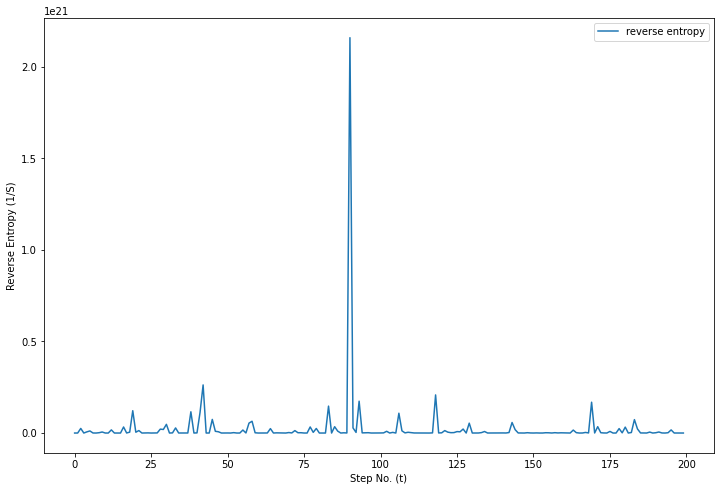

In [42]:
ax = pd.DataFrame(1/S, columns=['reverse entropy']).plot(figsize=(12,8), )
ax.set_xlabel("Step No. (t)")
ax.set_ylabel("Reverse Entropy (1/S)")

In [43]:
np.where((1/S).max() == 1/S)

(array([90]),)

In [ ]:
classes[classes == 3]

In [38]:
# import matplotlib as mpl
# cmap = mpl.cm.get_cmap('Paired')

classes_ = {'GRASS':'green', 'WINDOW':'yellow', 'PATH':'black', 'CEMENT':'gray', 'BRICKFACE':'orange', 'SKY':'blue', 'FOLIAGE':'red'}

In [ ]:
classes_

In [ ]:
classes_.index('GRASS')

In [ ]:
color_selection[0]

In [ ]:
traj[1, ]

In [ ]:
cmap(0)

In [39]:
color_selection = []

# classes = classes.tolist()

for i in range(len(classes)):
  color = classes_[classes[i]]
  color_selection.append(((i, i),  color))

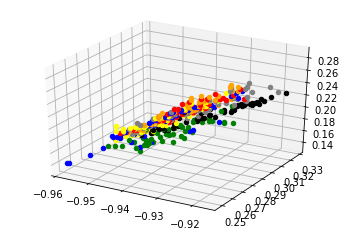

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
step = 10

for sel, col in color_selection:

  x = traj[step:step + 1, 0:1, :, :][0][0][0][sel[0]:sel[1]+1]
  y = traj[step:step + 1, 1:2, :, :][0][0][0][sel[0]:sel[1]+1]
  z = traj[step:step + 1, 2:3, :, :][0][0][0][sel[0]:sel[1]+1]
  x = np.real(x).astype(np.float64)
  y = np.real(y).astype(np.float64)
  z = np.real(z).astype(np.float64)
  norm = np.sqrt(x ** 2 + y ** 2 + z ** 2) ** -1

  ax.scatter(x * norm, y * norm, z * norm, c=col)
plt.show()

In [ ]:
traj[1:1 + 1, 0:1, :, :][0][0][0]


In [41]:
directory = '/content/drive/MyDrive/Project/EDQC/data/uci/{}/'.format(label.lower())

if not os.path.exists(directory):
        os.mkdir(directory)
        
os.chdir(directory)

_tmp = dqc.plot_steps(traj, color_selections=color_selection)
del(_tmp)

animator()

/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:326: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>